# Almgren and Chriss Model For Optimal Execution of Portfolio Transactions

### Introduction

We consider the execution of portfolio transactions with the aim of minimizing a combination of risk and transaction costs arising from permanent and temporary market impact. As an example, assume that you have a certain number of stocks that you want to sell within a given time frame. If you place this sell order directly to the market as it is, transaction costs may rise due to temporary market impact. On the other hand, if you split up into pieces in time, cost may rise due to volatility in the stock price.

[Almgren and Chriss](https://cims.nyu.edu/~almgren/papers/optliq.pdf) provided a solution to this problem by assuming the permanent and temporary market impact functions are linear functions of the rate of trading, and that stock prices follow a discrete arithmetic random walk.

In this notebook, we will take a look at the model used by Almgren and Chriss to solve the optimal liquidation problem. We will start by stating the formal definitions of *trading trajectory*, *trading list*, and *trading strategy* for liquidating a single stock.

### Trading Trajectory, Trading List, and Trading Strategy

We define trading trajectory, trading list, and trading strategy just as Almgren and Chriss did in their [paper](https://cims.nyu.edu/~almgren/papers/optliq.pdf). Suppose we hold $X$ shares of a stock that we want to liquidate before time $T$. Divide $T$ into $N$ intervals of length $\tau=\frac{T}{N}$ and define:

- $t_k = k\tau$ to be discrete times, where $k = 0,..,N$.


- A **trading trajectory** to be the list $(x_0,..,x_N)$, where $x_k$ is the number of shares we plan to hold at time $t_k$. We require that our initial position $x_0 = X$, and that at liquidation time $T$, $x_N = 0$. 


- A **trading list** to be $(n_1,..,n_N)$, $n_k =  x_{k-1} - x_k$ as the number of shares that we will sell between times $t_{k-1}$ and $t_k$.


- A **trading strategy** as a rule for determining $n_k$ from the information available at time $t_{k-1}$.

Below, we can see a visual example of a trading trajectory, for $N = 12$.

<img src="./trajectory.png" width="600" height="700">

## Price Dynamics

We will assume that the stock price evolves according to a discrete arithmetic random walk:

\begin{equation}
S_k = S_{k-1} + \sigma \tau^{1/2} \xi_k
\end{equation}

for $k = 1,..,N$ and where:

\begin{equation}
S_k = \text{ stock price at time $k$}\hspace{21.6cm}\\
\sigma = \text{ standard deviation of the fluctuations in stock price}\hspace{16.3cm}\\
\tau = \text{ length of discrete time interval}\hspace{20.2cm}\\
\xi_k = \text{ draws from independent random variables}\hspace{17.8cm}
\end{equation}

We will denote the initial stock price as $S_0$. The role of $\xi_k$ is to simulate random price fluctuations using random numbers drawn from a Normal Gaussian distribution with zero mean and unit variance. The code below shows us what this price model looks like, for an initial stock price of $S_0 =$ \$50 dollars, a standard deviation of price fluctuations of $\sigma = 0.379$, and a discrete time interval of $\tau = 1$. 

Average Stock Price: $50.01
Standard Deviation in Stock Price: $0.37


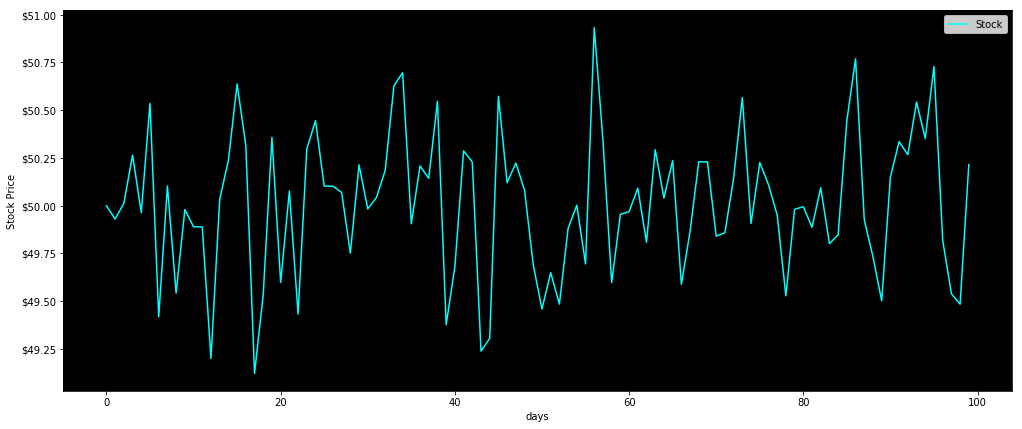

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import utils

# Set the default figure size
plt.rcParams['figure.figsize'] = [17.0, 7.0]

# Set the number of days to follow the stock price
n_days = 100

# Plot the stock price as a function of time
utils.plot_price_model(seed = 0, num_days = n_days)

## Market Impact

As we learned previously the price of a stock is affected by market impact that occurs every time we sell a stock. In their model, Almgren and Chriss distinguish between two types of market impact, permanent and temporary market impact. We will now add these two factors into our price model.

### Permanent Impact

Permanent market impact refers to changes in the equilibrium price of a stock as a direct function of our trading. Permanent market impact is called *permanent* because its effect persists for the entire liquidation period, $T$. We will denote the permanent price impact as $g(v)$, and will add it to our price model:

\begin{equation}
S_k = S_{k-1} + \sigma \tau^{1/2} \xi_k - \tau g\left(\frac{n_k}{\tau}\right)
\end{equation}

Here, we assumed the permanent impact function, $g(v)$, is a linear function of the trading rate, $v = n_k / \tau$. We will take $g(v)$ to have the form:

\begin{equation}
g(v) = \gamma \left(\frac{n_k}{\tau}\right)
\end{equation}

where $\gamma$ is a constant and has units of (\$/share${}^2$). Replacing this in the above equation we get:

\begin{equation}
S_k = S_{k-1} + \sigma \tau^{1/2} \xi_k - \gamma n_k
\end{equation}

With this form, we can see that for each $n$ shares that we sell, we will depress the stock price permanently by $n\gamma$, regardless of the time we take to sell the stocks.

### Temporary Impact

Temporary market impact refers to temporary imbalances in supply and demand caused by our trading. This leads to temporary price movements away from equilibrium. Temporary market impact is called *temporary* because its effect
dissipates by the next trading period. We will denote the temporary price impact as $h(v)$. Given this, the actual stock price at time $k$ is given by:

\begin{equation}
\tilde{S_k} = S_{k-1} - h\left(\frac{n_k}{\tau}\right)
\end{equation}

Where, we have again assumed the temporary impact function, $h(v)$, is a linear function of the trading rate, $v = n_k / \tau$. We will take $h(v)$ to have the form:

\begin{equation}
h(v) = \epsilon \mbox{ sign}(n_k) + \eta \left(\frac{n_k}{\tau}\right)
\end{equation}

where $\epsilon$ and $\eta$ are constants with units (\$/share) and (\$ time/share${}^2$), respectively. It is important to note that $h(v)$ does not affect the price $S_k$.

## Capture

We define the **Capture** to be the total profits resulting from trading along a particular trading trajectory, upon completion of all trades. We can compute the capture via:

\begin{equation}
\sum\limits_{k=1}^{N} n_k \tilde{S_k} = X S_0 + \sum\limits_{k=1}^{N} \left(\sigma \tau^{1/2} \xi_k - \tau g\left(\frac{n_k}{\tau}\right)\right) x_k - \sum\limits_{k=1}^{N} n_k h\left(\frac{n_k}{\tau}\right)
\end{equation}

As we can see this is the sum of the product of the number of shares $n_k$ that we sell in each time interval, times the effective price per share $\tilde{S_k}$ received on that sale.

## Implementation Shortfall

We define the **Implementation Shortfall** as the total cost of trading and is given by:

\begin{equation}
I_s = X S_0 - \sum_{k = 1}^N n_k \tilde{S_k}
\end{equation}

This is what we seek to minimize when determining the best trading strategy!

Note that since $\xi_k$ is random, so is the implementation shortfall. Therefore, we have to frame the minimization problem in terms of the expectation value of the shortfall and its corresponding variance. We'll refer to $E(x)$ as the expected shortfall and $V(x)$ as the variance of the shortfall. Simplifying the above equation for $I_s$, is easy to see that:

\begin{equation}
E(x) = \sum\limits_{k=1}^{N} \tau x_k g\left(\frac{n_k}{\tau}\right) + \sum\limits_{k=1}^{N} n_k h\left(\frac{n_k}{\tau}\right)
\end{equation}

and

\begin{equation}
V(x) = \sigma^2 \sum\limits_{k=1}^{N} \tau {x_k}^2
\end{equation}

The units of $E(x)$ are dollars and the units of $V(x)$ are dollars squared. So now, we can reframe our minimization problem in terms of $E(x)$ and $V(x)$.
For a given level of variance of shortfall, $V(x)$, we seek to minimize the expectation of shortfall, $E(x)$. In the next section we will see how to solve this problem.

## Utility Function

Our goal now is to find the strategy that has the minimum expected shortfall $E(x)$ for a given maximum level of variance $V(x) \ge 0$. This constrained optimization problem can be solved by introducing a Lagrange multiplier $\lambda$. Therefore, our problem reduces to finding the trading strategy that minimizes the **Utility Function** $U(x)$:

\begin{equation}
U(x) = E(x) + \lambda V(x)
\end{equation}

The parameter $\lambda$ is referred to as **trader’s risk aversion** and controls how much we penalize the variance relative to the expected shortfall.  

The intuition of this utility function can be thought of as follows. Consider a stock which exhibits high price volatility and thus a high risk of price movement away from the equilibrium price. A risk averse trader would prefer to trade a large portion of the volume immediately, causing a known price impact, rather than risk trading in small increments at successively adverse prices. Alternatively, if the price is expected to be stable over the liquidation period, the trader would rather split the trade into smaller sizes to avoid price impact. This trade-off between speed of execution and risk of price movement is ultimately what governs the structure of the resulting trade list.


# Optimal Trading Strategy

Almgren and Chriss solved the above problem and showed that for each value
of risk aversion there is a uniquely determined optimal execution strategy. The details of their derivation is discussed in their [paper](https://cims.nyu.edu/~almgren/papers/optliq.pdf). Here, we will just state the general solution. 

The optimal trajectory is given by:

\begin{equation}
x_j = \frac{\sinh \left( \kappa \left( T-t_j\right)\right)}{ \sinh (\kappa T)}X, \hspace{1cm}\text{ for } j=0,...,N
\end{equation}

and the associated trading list:

\begin{equation}
n_j = \frac{2 \sinh \left(\frac{1}{2} \kappa \tau \right)}{ \sinh \left(\kappa T\right) } \cosh \left(\kappa \left(T - t_{j-\frac{1}{2}}\right)\right) X, \hspace{1cm}\text{ for } j=1,...,N
\end{equation}

where $t_{j-1/2} = (j-\frac{1}{2}) \tau$. The expected shortfall and variance of the optimal trading strategy are given by:

<img src="./eq.png" width="700" height="900">

In the above equations $\kappa$ is given by:

\begin{align*}
&\kappa = \frac{1}{\tau}\cosh^{-1}\left(\frac{\tau^2}{2}\tilde{\kappa}^2 + 1\right)
\end{align*}

where:

\begin{align*}
&\tilde{\kappa}^2 = \frac{\lambda \sigma^2}{\tilde{\eta}} = \frac{\lambda \sigma^2}{\eta \left(1-\frac{\gamma \tau}{2 \eta}\right)}
\end{align*}



# Trading Lists and Trading Trajectories

### Introduction

[Almgren and Chriss](https://cims.nyu.edu/~almgren/papers/optliq.pdf) provided a solution to the optimal liquidation problem by assuming the that stock prices follow a discrete arithmetic random walk, and that the permanent and temporary market impact functions are linear functions of the trading rate.

Almgren and Chriss showed that for each value of risk aversion there is a unique optimal execution strategy. This optimal execution strategy is determined by a trading trajectory and its associated trading list. The optimal trading trajectory is given by:

\begin{equation}
x_j = \frac{\sinh \left( \kappa \left( T-t_j\right)\right)}{ \sinh (\kappa T)}X, \hspace{1cm}\text{ for } j=0,...,N
\end{equation}

and the associated trading list is given by:

\begin{equation}
n_j = \frac{2 \sinh \left(\frac{1}{2} \kappa \tau \right)}{ \sinh \left(\kappa T\right) } \cosh \left(\kappa \left(T - t_{j-\frac{1}{2}}\right)\right) X, \hspace{1cm}\text{ for } j=1,...,N
\end{equation}

where $t_{j-1/2} = (j-\frac{1}{2}) \tau$.

Given some initial parameters, such as the number of shares, the liquidation time, the trader's risk aversion, etc..., the trading list will tell us how many shares we should sell at each trade to minimize our transaction costs. 

In this notebook, we will see how the trading list varies according to some initial trading parameters. 

## Visualizing Trading Lists and Trading Trajectories

Let's assume we have 1,000,000 shares that we wish to liquidate. In the code below, we will plot the optimal trading trajectory and its associated trading list for different trading parameters, such as trader's risk aversion, number of trades, and liquidation time. 

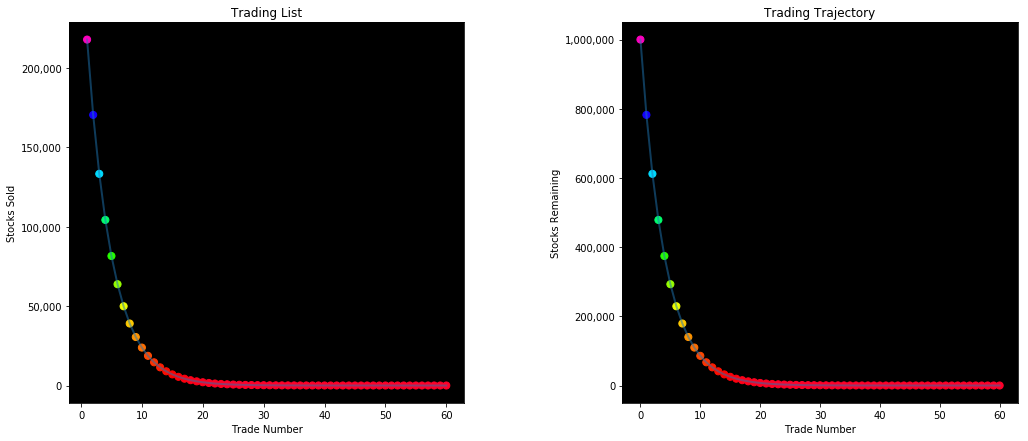


Number of Shares Sold: 1,000,000



Trade Number,Stocks Sold,Stocks Remaining
0,0,"1,000,000"
1,"217,778","782,222"
2,"170,351","611,871"
3,"133,252","478,619"
4,"104,233","374,386"
5,"81,533","292,853"
6,"63,777","229,076"
7,"49,888","179,188"
8,"39,023","140,165"
9,"30,525","109,640"


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import utils

# We set the default figure size
plt.rcParams['figure.figsize'] = [17.0, 7.0]


# Set the number of days to sell all shares (i.e. the liquidation time)
l_time = 60

# Set the number of trades
n_trades = 60

# Set the trader's risk aversion
t_risk = 1e-6

# Plot the trading list and trading trajectory. If show_trl = True, the data frame containing the values of the
# trading list and trading trajectory is printed
utils.plot_trade_list(lq_time = l_time, nm_trades = n_trades, tr_risk = t_risk, show_trl = True)

# Implementing a Trading List

Once we have the trading list for a given set of initial parameters, we can actually implement it. That is, we can sell our shares in the stock market according to the trading list and see how much money we made or lost. To do this, we are going to simulate the stock market with a simple trading environment. This simulated trading environment uses the same price dynamics and market impact functions as the Almgren and Chriss model. That is, stock price movements evolve according to a discrete arithmetic random walk and the permanent and temporary market impact functions are linear functions of the trading rate. We are going to use the same environment to train our Deep Reinforcement Learning algorithm later on.

We will describe the details of the trading environment in another notebook, for now we will just take a look at its default parameters. We will distinguish between financial parameters, such the annual volatility in stock price, and the parameters needed to calculate the trade list using the Almgren and Criss model, such as the trader's risk aversion.

In [2]:
import utils

# Get the default financial and AC Model parameters
financial_params, ac_params = utils.get_env_param()
print(financial_params)
print(ac_params)

                              Financial Parameters                              
Annual Volatility:                12%   Bid-Ask Spread:                    0.125
Daily Volatility:                0.8%   Daily Trading Volume:          5,000,000
                                           Almgren and Chriss Model Parameters                                           
Total Number of Shares to Sell:                           1,000,000   Fixed Cost of Selling per Share:             $0.062
Starting Price per Share:                                    $50.00   Trader's Risk Aversion:                       1e-06
Price Impact for Each 1% of Daily Volume Traded:           $2.5e-06   Permanent Impact Constant:                  2.5e-07
Number of Days to Sell All the Shares:                           60   Single Step Variance:                         0.144
Number of Trades:                                                60   Time Interval between trades:                   1.0


Implementation Shortfall: $480,925.46 



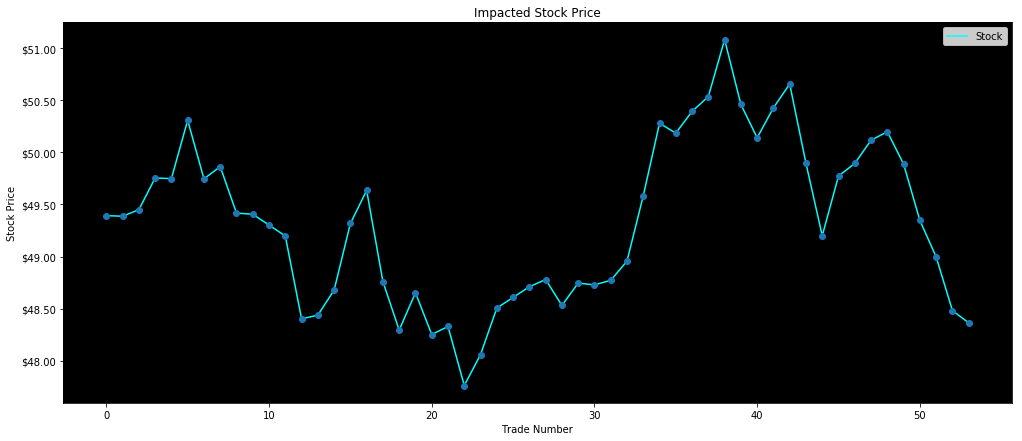

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

import utils

# We set the default figure size
plt.rcParams['figure.figsize'] = [17.0, 7.0]


# Set the random seed
sd = 0

# Set the number of days to sell all shares (i.e. the liquidation time)
l_time = 60

# Set the number of trades
n_trades = 60

# Set the trader's risk aversion
t_risk = 1e-6

# Implement the trading list for the given parameters
utils.implement_trade_list(seed = sd, lq_time = l_time, nm_trades = n_trades, tr_risk = t_risk)

# The Efficient Frontier of Optimal Portfolio Transactions

### Introduction

[Almgren and Chriss](https://cims.nyu.edu/~almgren/papers/optliq.pdf) showed that for each value of risk aversion there is a unique optimal execution strategy. The optimal strategy is obtained by minimizing the **Utility Function** $U(x)$:

\begin{equation}
U(x) = E(x) + \lambda V(x)
\end{equation}

where $E(x)$ is the **Expected Shortfall**, $V(x)$ is the **Variance of the Shortfall**, and $\lambda$ corresponds to the trader’s risk aversion. The expected shortfall and variance of the optimal trading strategy are given by:

<img src="./text_images/eq.png" width="700" height="900">

In this notebook, we will learn how to visualize and interpret these equations.

# The Expected Shortfall

As we saw in the previous notebook, even if we use the same trading list, we are not guaranteed to always get the same implementation shortfall due to the random fluctuations in the stock price. This is why we had to reframe the problem of finding the optimal strategy in terms of the average implementation shortfall and the variance of the implementation shortfall. We call the average implementation shortfall, the expected shortfall $E(x)$, and the variance of the implementation shortfall $V(x)$. So, whenever we talk about the expected shortfall we are really talking about the average implementation shortfall. Therefore, we can think of the expected shortfall as follows. Given a single trading list, the expected shortfall will be the value of the average implementation shortfall if we were to implement this trade list in the stock market many times. 

To see this, in the code below we implement the same trade list on 50,000 trading simulations. We call each trading simulation an episode. Each episode will consist of different random fluctuations in stock price. For each episode we will compute the corresponding implemented shortfall. After all the 50,000 trading simulations have been carried out we calculate the average implementation shortfall and the variance of the implemented shortfalls. We can then compare these values with the values given by the equations for $E(x)$ and $V(x)$ from the Almgren and Chriss model.

Average Implementation Shortfall: $579,001.15
Standard Deviation of the Implementation Shortfall: $524,293.07


Number of Days to Sell All the Shares:,60,Initial Portfolio Value:,"$50,000,000.00"
Half-Life of The Trade:,4.1,Expected Shortfall:,"$477,712.60"
Utility:,"$704,723.22",Standard Deviation of Shortfall:,"$476,456.32"


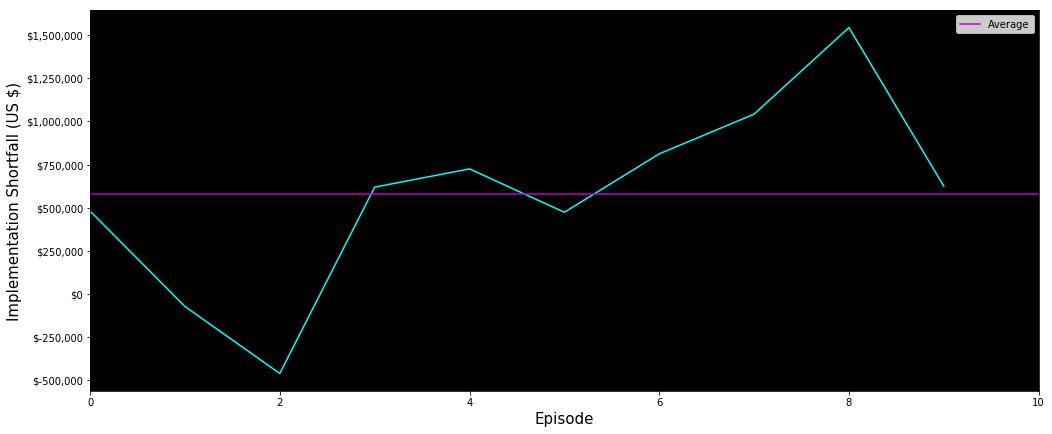

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

import utils

# Set the default figure size
plt.rcParams['figure.figsize'] = [17.0, 7.0]
 

# Set the liquidation time
l_time = 60

# Set the number of trades
n_trades = 60

# Set trader's risk aversion
t_risk = 1e-6

# Set the number of episodes to run the simulation
episodes = 10
 
utils.get_av_std(lq_time = l_time, nm_trades = n_trades, tr_risk = t_risk, trs = episodes)
    
# Get the AC Optimal strategy for the given parameters
ac_strategy = utils.get_optimal_vals(lq_time = l_time, nm_trades = n_trades, tr_risk = t_risk)
ac_strategy

# Extreme Trading Strategies

Because some investors may be willing to take more risk than others, when looking for the optimal strategy we have to consider a wide range of risk values, ranging from those traders that want to take zero risk to those who want to take as much risk as possible. Let's take a look at these two extreme cases. We will define the **Minimum Variance** strategy as that one followed by a trader that wants to take zero risk and the **Minimum Impact** strategy at that one followed by a trader that wants to take as much risk as possible. Let's take a look at the values of $E(x)$ and $V(x)$ for these extreme trading strategies. The `utils.get_min_param()` uses the above equations for $E(x)$ and $V(x)$, along with the parameters from the trading environment to calculate the expected shortfall and standard deviation (the square root of the variance) for these strategies. We'll start by looking at the Minimum Impact strategy.

In [5]:
import utils

# Get the minimum impact and minimum variance strategies
minimum_impact, minimum_variance = utils.get_min_param()

### Minimum Impact Strategy

This trading strategy will be taken by trader that has no regard for risk. In the Almgren and Chriss model this will correspond to having the trader's risk aversion set to $\lambda = 0$. In this case the trader will sell the shares at a constant rate over a long period of time. By doing so, he will minimize market impact, but will be at risk of losing a lot of money due to the large variance. Hence, this strategy will yield the lowest possible expected shortfall and the highest possible variance, for a given set of parameters. We can see that for the given parameters, this strategy yields an expected shortfall of \$197,000 dollars but has a very big standard deviation of over 3 million dollars. 

In [6]:
minimum_impact

Number of Days to Sell All the Shares:,250,Initial Portfolio Value:,"$50,000,000.00"
Half-Life of The Trade:,"1,284,394.9",Expected Shortfall:,"$197,000.00"
Utility:,"$197,000.00",Standard Deviation of Shortfall:,"$3,453,707.55"


### Minimum Variance Strategy

This trading strategy will be taken by trader that wants to take zero risk, regardless of transaction costs. In the Almgren and Chriss model this will correspond to having a variance of $V(x) = 0$. In this case, the trader would prefer to sell the all his shares immediately, causing a known price impact, rather than risk trading in small increments at successively adverse prices. This strategy will yield the smallest possible variance, $V(x) = 0$, and the highest possible expected shortfall, for a given set of parameters. We can see that for the given parameters, this strategy yields an expected shortfall of over 2.5 million dollars but has a standard deviation equal of zero.

In [7]:
minimum_variance

Number of Days to Sell All the Shares:,1,Initial Portfolio Value:,"$50,000,000.00"
Half-Life of The Trade:,0.2,Expected Shortfall:,"$2,562,500.00"
Utility:,"$2,562,500.00",Standard Deviation of Shortfall:,$0.00


# The Efficient Frontier

The goal of Almgren and Chriss was to find the optimal strategies that lie between these two extremes. In their paper, they showed how to compute the trade list that minimizes the expected shortfall for a wide range of risk values. In their model, Almgren and Chriss used the parameter $\lambda$ to measure a trader's risk-aversion. The value of $\lambda$ tells us how much a trader is willing to penalize the variance of the shortfall, $V(X)$, relative to expected shortfall, $E(X)$. They showed that for each value of $\lambda$ there is a uniquely determined optimal execution strategy. We define the **Efficient Frontier** to be the set of all these optimal trading strategies. That is, the efficient frontier is the set that contains the optimal trading strategy for each value of $\lambda$.

The efficient frontier is often visualized by plotting $(x,y)$ pairs for a wide range of $\lambda$ values, where the $x$-coordinate is given by the equation of the expected shortfall, $E(X)$, and the $y$-coordinate is given by the equation of the variance of the shortfall, $V(X)$. Therefore, for a given a set of parameters, the curve defined by the efficient frontier represents the set of optimal trading strategies that give the lowest expected shortfall for a defined level of risk.

In the code below, we plot the efficient frontier for $\lambda$ values in the range $(10^{-7}, 10^{-4})$, using the default parameters in our trading environment. Each point of the frontier represents a distinct strategy for optimally liquidating the same number of stocks. A risk-averse trader, who wishes to sell quickly to reduce exposure to stock price volatility, despite the trading costs incurred in doing so, will likely choose a value of $\lambda = 10^{-4}$. On the other hand, a trader
who likes risk, who wishes to postpones selling, will likely choose a value of $\lambda = 10^{-7}$. In the code, you can choose a particular value of $\lambda$ to see the expected shortfall and level of variance corresponding to that particular value of trader's risk aversion.

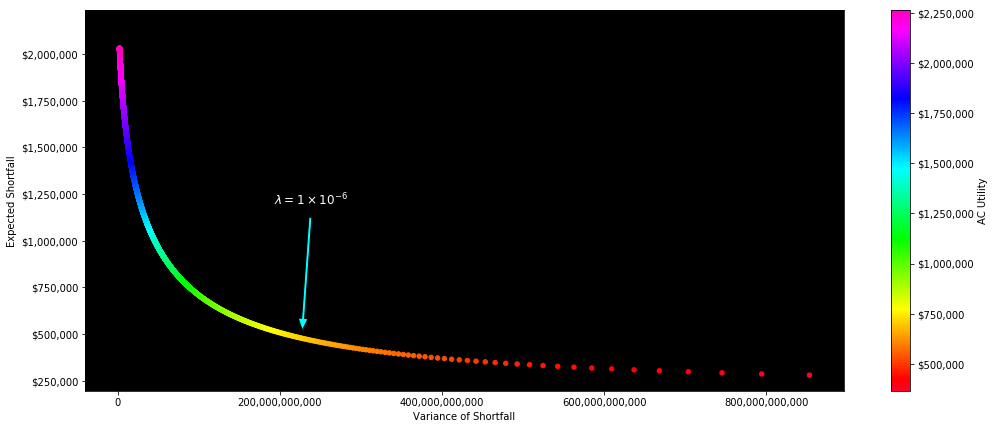

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

import utils

# Set the default figure size
plt.rcParams['figure.figsize'] = [17.0, 7.0]
    
# Plot the efficient frontier for the default values. The plot points out the expected shortfall and variance of the
# optimal strategy for the given the trader's risk aversion. Valid range for the trader's risk aversion (1e-7, 1e-4). 
utils.plot_efficient_frontier(tr_risk = 1e-6)